In [1]:
import numpy as np 
import pandas as pd
from epiweeks import Week
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
from utils import load_preds, COLOR_MAP
import matplotlib as mpl
# Definir a cor das bordas (spines) como cinza
mpl.rcParams['axes.edgecolor'] = 'gray'

# Definir a cor das linhas dos ticks maiores e menores como cinza
mpl.rcParams['xtick.color'] = 'gray'
mpl.rcParams['ytick.color'] = 'gray'
mpl.rcParams['xtick.labelcolor'] = 'black'
mpl.rcParams['ytick.labelcolor'] = 'black'

In [2]:
states_ne = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'SE', 'RN']
states_se = ['SP', 'RJ', 'ES', 'MG']
states_sul = ['RS', 'SC', 'PR' ]
states_ce = ['DF', 'MT', 'MS', 'GO']
states_no = ['AP', 'TO', 'RR', 'RO', 'AM' ,'AC', 'PA']

states_BR = states_ne+states_se+states_no+states_ce+states_sul

In [3]:
dates_23b = pd.date_range(start= Week(2022, 25).startdate().strftime('%Y-%m-%d'),
              end= Week(2022, 41).startdate().strftime('%Y-%m-%d'),
              freq='W-SUN')

dates_23 = pd.date_range(start= Week(2022, 41).startdate().strftime('%Y-%m-%d'),
              end= Week(2023, 39).startdate().strftime('%Y-%m-%d'),
              freq='W-SUN')

dates_24b = pd.date_range(start= Week(2023, 25).startdate().strftime('%Y-%m-%d'),
              end= Week(2023, 41).startdate().strftime('%Y-%m-%d'),
              freq='W-SUN')

dates_24 = pd.date_range(start= Week(2023, 41).startdate().strftime('%Y-%m-%d'),
              end= Week(2024, 23).startdate().strftime('%Y-%m-%d'),
              freq='W-SUN')

dates_25 = pd.date_range(start= Week(2024, 41).startdate().strftime('%Y-%m-%d'),
              end= Week(2025, 40).startdate().strftime('%Y-%m-%d'),
              freq='W-SUN')

In [4]:
df_preds, models_by_state, data_all = load_preds(exclude = False)

df_preds.head()

,date,pred,lower,upper,state,model_id
0,2022-10-09,110.690113,64.291013,219.826948,AC,A
1,2022-10-16,144.952846,77.564037,279.722708,AC,A
2,2022-10-23,163.613937,92.915072,276.591399,AC,A
3,2022-10-30,170.240443,87.197631,378.407811,AC,A
4,2022-11-06,215.117888,111.835667,445.024983,AC,A


In [5]:
df_preds.isnull().sum()

date        0
pred        0
lower       0
upper       0
state       0
model_id    0
dtype: int64

### PLOT RETROSPECTIVE FORECASTS: 

In [6]:
def make_plot(ax0, ax1, data23, data23b, data24,data24b, df_preds23, df_preds24, color_map, legend = True): 

    custom_lines = []
            
    ax0.plot(data23b.date, data23b.casos, color = 'black', marker = 'o', markersize = 2)
    ax0.plot(data23.date, data23.casos, color = 'black', ls = '--')
    ax0.set_title(f'Forecast - {state} - 2023')
    ax1.plot(data24b.date, data24b.casos, color = 'black', marker = 'o', markersize = 2)
    ax1.plot(data24.date, data24.casos, color = 'black', ls = '--')
    ax1.set_title(f'Forecast - {state} - 2024')
    
    for model_id, color in zip(color_map.keys(),
                                       color_map.values()):

        df_preds23_ = df_preds23.loc[(df_preds23.model_id == model_id)]
        df_preds24_ = df_preds24.loc[(df_preds24.model_id == model_id)]
    
        try:
            if (model_id[:2] == 'ln') or (model_id[:3] == 'lin'):
                ax0.plot(df_preds23_.date, df_preds23_.pred, linestyle = 'dotted', color = color)
                ax0.fill_between(df_preds23_.date, df_preds23_.lower, df_preds23_.upper, color = color, alpha = 0.5)
        
                ax1.plot(df_preds24_.date, df_preds24_.pred, linestyle = 'dotted', color = color)
                ax1.fill_between(df_preds24_.date, df_preds24_.lower, df_preds24_.upper, color = color, alpha = 0.5)

                custom_lines.append(Line2D([0], [0], color=color, linestyle='dotted', linewidth =2))

            else: 
                ax0.plot(df_preds23_.date, df_preds23_.pred, color = color, alpha=1)
                ax0.fill_between(df_preds23_.date, df_preds23_.lower, df_preds23_.upper, color = color, alpha = 0.25)
        
                ax1.plot(df_preds24_.date, df_preds24_.pred, color = color,  alpha=1)
                ax1.fill_between(df_preds24_.date, df_preds24_.lower, df_preds24_.upper, color = color, alpha = 0.25)

                custom_lines.append(Line2D([0], [0], color=color, linestyle='-', linewidth =2))
            

    
    
        except:
            print(f'Prediction for {state} from {model_id} is not available')  
                 
        #ax.set_title(f'{state} - 2025')
    
    for ax2 in [ax0, ax1]: 
        ax2.grid()
        ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))  # Format as 'Jan 22'
        
    ax0.set_ylabel('New cases', fontsize = 12)

    if legend: 
        custom_lines = list(custom_lines)
        names = list(color_map.keys())

        custom_lines.insert(0, Line2D([0], [0], color='black', linestyle='--', linewidth =2))

        names.insert(0, 'Data')
        
        
        ax1.legend(custom_lines, names, title ='Model', bbox_to_anchor=(1.0
                                                                           , 0.5, 0.1, 0.5))


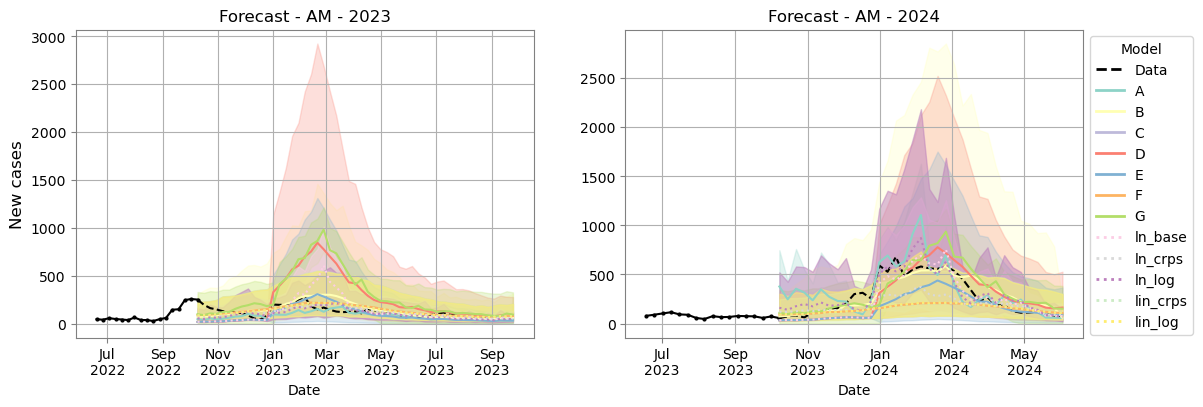

In [7]:
fig,ax_ = plt.subplots(1, 2, figsize = (13, 4.0))

ax = ax_.ravel()

state = 'AM'
data_f = data_all.loc[data_all.uf == state]

data23 = data_f.loc[data_f.date.isin(dates_23)]
data24 = data_f.loc[data_f.date.isin(dates_24)]

data23b = data_f.loc[data_f.date.isin(dates_23b)]
data24b = data_f.loc[data_f.date.isin(dates_24b)]

df_preds_f = df_preds.loc[df_preds.state ==state]
df_preds23 = df_preds_f.loc[df_preds_f.date.isin(dates_23)].sort_values(by = 'date')
df_preds24 = df_preds_f.loc[df_preds_f.date.isin(dates_24)].sort_values(by = 'date')

make_plot(ax[0], ax[1], data23, data23b, data24, data24b, df_preds23, df_preds24, COLOR_MAP)

ax[0].set_xlabel('Date')
ax[1].set_xlabel('Date')

plt.savefig('../figures/forecast_AM.pdf', bbox_inches = 'tight')
plt.show()